In [17]:
import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("mrsimple07/student-exam-performance-prediction")

print("Path to dataset files:", path)

print("Files in dataset directory:", os.listdir(path))

csv_file = os.path.join(path, 'student_exam_data.csv')

if os.path.exists(csv_file):
    df = pd.read_csv(csv_file)
    print("Dataset loaded successfully. First 5 rows:")
    print(df.head())
else:
    print(f"Error: CSV file not found at {csv_file}. Please check the file name or directory content.")

Using Colab cache for faster access to the 'student-exam-performance-prediction' dataset.
Path to dataset files: /kaggle/input/student-exam-performance-prediction
Files in dataset directory: ['student_exam_data_new.csv', 'student_exam_data.csv']
Dataset loaded successfully. First 5 rows:
   Study Hours  Previous Exam Score  Pass/Fail
0     4.370861            81.889703          0
1     9.556429            72.165782          1
2     7.587945            58.571657          0
3     6.387926            88.827701          1
4     2.404168            81.083870          0


### 1. Preparação dos Dados
Primeiro, vamos importar as bibliotecas necessárias, converter os dados `X` e `y` para tensores do PyTorch e dividir os dados em conjuntos de treinamento e teste.

In [23]:
# Definição explícita de X (features) e y (target)
X = df[['Study Hours', 'Previous Exam Score']].values
y = df['Pass/Fail'].values

print("Variáveis X e y definidas a partir do DataFrame.")

Variáveis X e y definidas a partir do DataFrame.


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Converter os arrays numpy para tensores PyTorch
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float().view(-1, 1)

#Variáveis X and Y existem no estado atual do Kernel,
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

print("Dados preparados para treinamento e teste.")

Dados preparados para treinamento e teste.


### 2. Definição do Modelo de Regressão Logística
Vamos definir a arquitetura do nosso modelo usando `torch.nn.Module`.

In [26]:
# Definição explícita de input_dim com base no número de features em X
input_dim = X.shape[1]

print(f"input_dim definido como: {input_dim}")

input_dim definido como: 2


In [25]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

# Instanciar o modelo
model = LogisticRegression(input_dim)

print("Modelo de Regressão Logística definido e instanciado.")

Modelo de Regressão Logística definido e instanciado.


### 3. Configuração do Treinamento
Agora, definiremos a função de perda e o otimizador.

In [11]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

print("Função de perda (BCELoss) e otimizador (SGD) configurados.")

Função de perda (BCELoss) e otimizador (SGD) configurados.


### 4. Treinamento do Modelo
Vamos treinar o modelo usando os dados de treinamento.

In [29]:
num_epochs = 1000

print(f"Número de épocas para treinamento definido como: {num_epochs}")

Número de épocas para treinamento definido como: 1000


In [28]:
for epoch_val in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch_val + 1) % 100 == 0:
        print(f'Época [{epoch_val+1}/{num_epochs}], Perda: {loss.item():.4f}')

print("Treinamento do modelo concluído.")

Época [100/1000], Perda: 1.5619
Época [200/1000], Perda: 1.5619
Época [300/1000], Perda: 1.5619
Época [400/1000], Perda: 1.5619
Época [500/1000], Perda: 1.5619
Época [600/1000], Perda: 1.5619
Época [700/1000], Perda: 1.5619
Época [800/1000], Perda: 1.5619
Época [900/1000], Perda: 1.5619
Época [1000/1000], Perda: 1.5619
Treinamento do modelo concluído.


### 5. Avaliação do Modelo
Finalmente, vamos avaliar o desempenho do modelo no conjunto de teste.

In [13]:
with torch.no_grad():
    y_pred_tensor = model(X_test)
    y_pred_class = (y_pred_tensor > 0.5).float()
    accuracy = accuracy_score(y_test.numpy(), y_pred_class.numpy())

print(f"Acurácia do modelo no conjunto de teste: {accuracy:.4f}")

Acurácia do modelo no conjunto de teste: 0.6400


### 6. Visualização da Fronteira de Decisão
Vamos plotar os dados de treinamento e a fronteira de decisão aprendida pelo modelo.

Gerando gráfico da fronteira de decisão para os dados de treinamento...


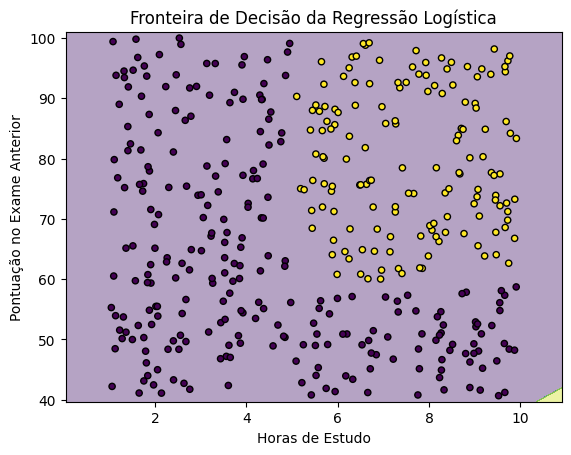

Gerando gráfico da fronteira de decisão para os dados de teste...


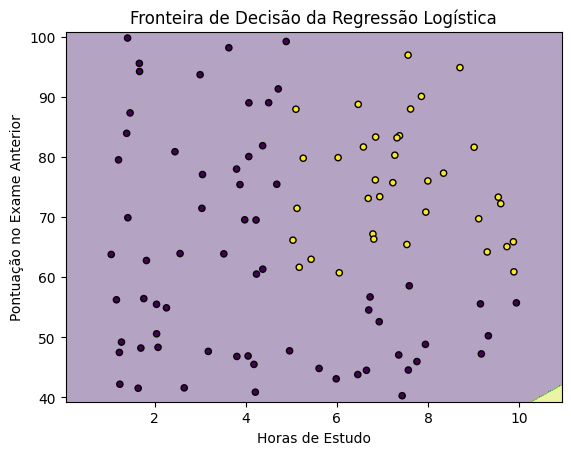

In [15]:
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
    Z = (Z > 0.5).float().reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), s=20, edgecolor='k')
    plt.title("Fronteira de Decisão da Regressão Logística")
    plt.xlabel("Horas de Estudo")
    plt.ylabel("Pontuação no Exame Anterior")
    plt.show()

print("Gerando gráfico da fronteira de decisão para os dados de treinamento...")
plot_decision_boundary(model, X_train.numpy(), y_train.numpy())

print("Gerando gráfico da fronteira de decisão para os dados de teste...")
plot_decision_boundary(model, X_test.numpy(), y_test.numpy())